# Setup Path dan Impor Modul

In [13]:
import sys
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Menambahkan path ke direktori utama agar bisa mengimpor modul noventis
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Impor kelas yang akan digunakan
from noventis.data_cleaner import NoventisOutlierHandler
print('Successfully imported modules!')

Successfully imported modules!


# Memuat Dataset

In [6]:
try:
    df_diamonds = pd.read_csv('../dataset/diamonds.csv')
    print("Dataset Diamonds berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'train.csv' dari dataset Ames Housing ada di direktori yang sama dengan notebook Anda.")

Dataset Diamonds berhasil dimuat.


# Visualisasi Outlier Sebelum Penanganan

Bentuk data awal: (53940, 11)

Statistik Deskriptif Awal:


,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,5.731157,5.734526,3.538734
std,3989.439738,1.121761,1.142135,0.705699
min,326.000000,0.000000,0.000000,0.000000
25%,950.000000,4.710000,4.720000,2.910000
50%,2401.000000,5.700000,5.710000,3.530000
75%,5324.250000,6.540000,6.540000,4.040000
max,18823.000000,10.740000,58.900000,31.800000


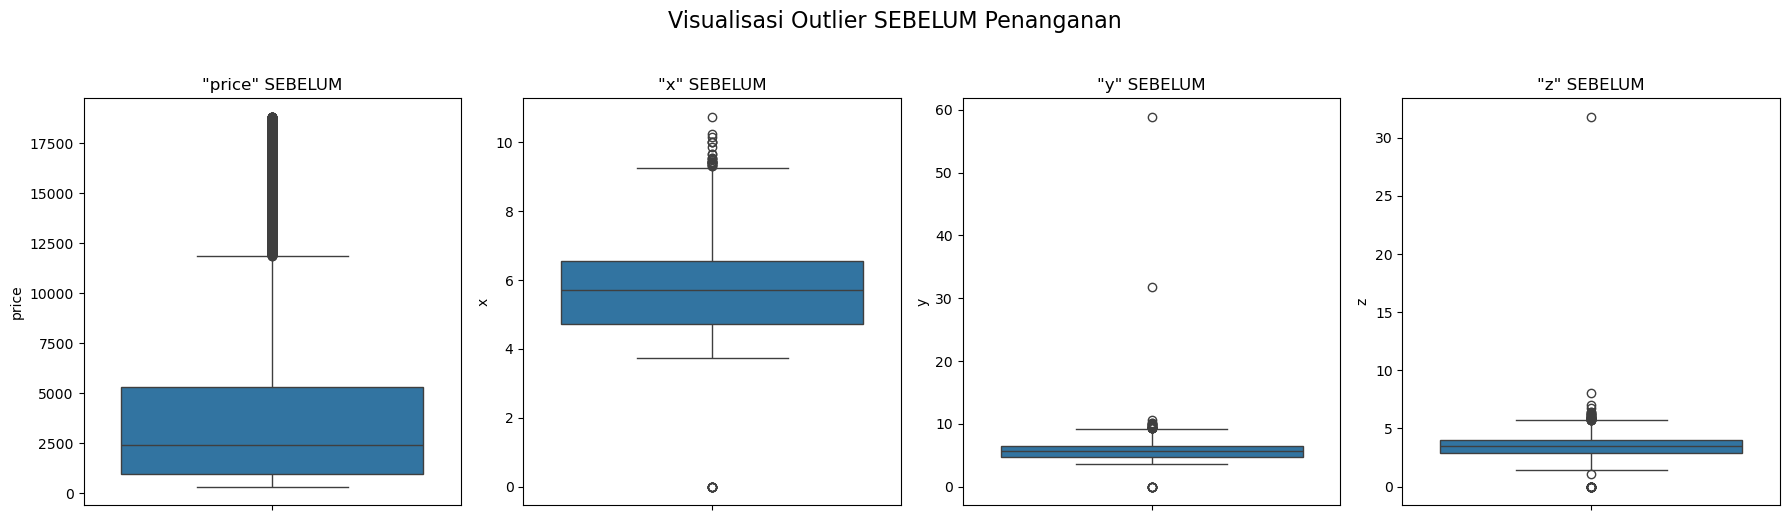

In [11]:
cols_to_check = ['price', 'x', 'y', 'z']
print(f"Bentuk data awal: {df_diamonds.shape}")
print("\nStatistik Deskriptif Awal:")
display(df_diamonds[cols_to_check].describe())

# Visualisasi SEBELUM
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sb.boxplot(y=df_diamonds[col])
    plt.title(f'"{col}" SEBELUM')
plt.suptitle('Visualisasi Outlier SEBELUM Penanganan', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

# Contoh 1 - Menggunakan Mode Otomatis


--- Menjalankan Outlier Handler dengan Mode Otomatis ---
Bentuk data setelah penanganan 'auto': (37910, 11)
Statistik Deskriptif SETELAH Mode Otomatis:


,price,x,y,z
count,37910.000000,37910.000000,37910.000000,37910.000000
mean,3589.385574,5.642271,5.646983,3.487036
std,3308.333585,1.013803,1.009746,0.627732
min,544.000000,4.290000,4.300000,2.650000
25%,941.000000,4.700000,4.710000,2.900000
50%,1964.000000,5.390000,5.400000,3.320000
75%,5339.750000,6.520000,6.520000,4.030000
max,13107.100000,7.660000,7.650000,4.730000


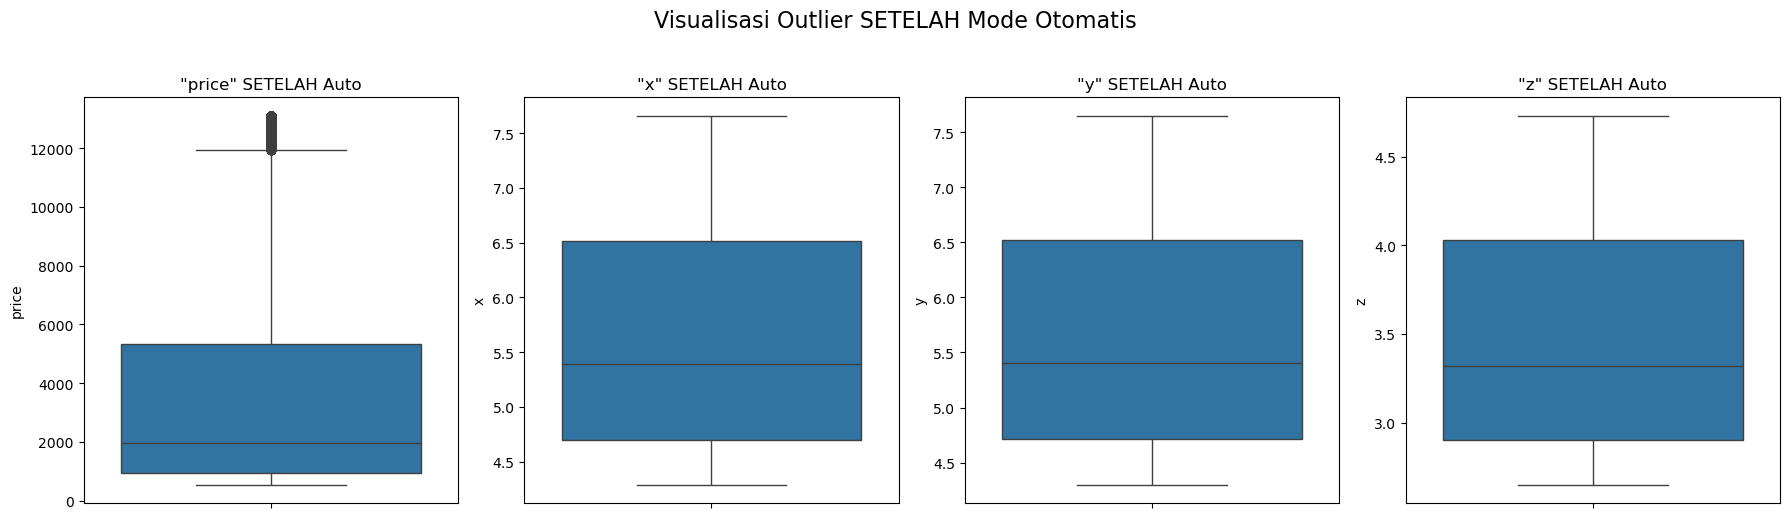

In [14]:
print("\n--- Menjalankan Outlier Handler dengan Mode Otomatis ---")

# 1. Inisialisasi handler (mode otomatis adalah default)
handler_auto = NoventisOutlierHandler()

# 2. Fit dan transform
df_handled_auto = handler_auto.fit_transform(df_diamonds.copy())

# 3. Verifikasi Hasil
print(f"Bentuk data setelah penanganan 'auto': {df_handled_auto.shape}")
print("Statistik Deskriptif SETELAH Mode Otomatis:")
display(df_handled_auto[cols_to_check].describe())

# Visualisasi SETELAH
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sb.boxplot(y=df_handled_auto[col])
    plt.title(f'"{col}" SETELAH Auto')
plt.suptitle('Visualisasi Outlier SETELAH Mode Otomatis', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

# Contoh 2 - Metode Manual 'Winsorize'


--- Menjalankan Outlier Handler dengan Metode 'Winsorize' ---
Bentuk data setelah 'winsorize': (53940, 11) (tidak berubah)
Statistik Deskriptif SETELAH Winsorize (1%-99%):


,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,3926.017942,5.729961,5.731994,3.537917
std,3964.339884,1.112109,1.104513,0.686356
min,429.000000,4.020000,4.040000,2.480000
25%,950.000000,4.710000,4.720000,2.910000
50%,2401.000000,5.700000,5.710000,3.530000
75%,5324.250000,6.540000,6.540000,4.040000
max,17378.220000,8.360000,8.340000,5.150000


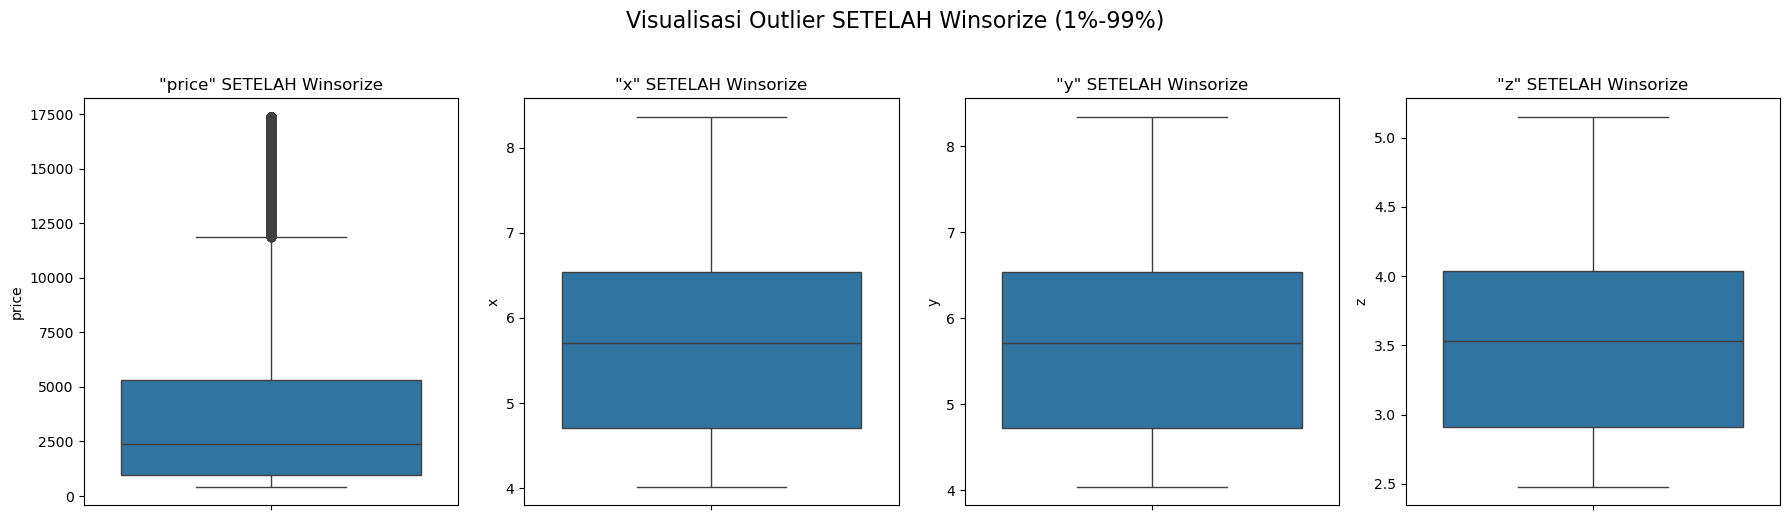

In [15]:
print("\n--- Menjalankan Outlier Handler dengan Metode 'Winsorize' ---")

# 1. Inisialisasi handler, paksa gunakan 'winsorize' dengan rentang 1% - 99%
handler_winsorize = NoventisOutlierHandler(default_method='winsorize', quantile_range=(0.01, 0.99))

# 2. Fit dan transform
df_winsorized = handler_winsorize.fit_transform(df_diamonds.copy())

# 3. Verifikasi Hasil
print(f"Bentuk data setelah 'winsorize': {df_winsorized.shape} (tidak berubah)")
print("Statistik Deskriptif SETELAH Winsorize (1%-99%):")
display(df_winsorized[cols_to_check].describe())

# Visualisasi SETELAH
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols_to_check):
    plt.subplot(1, len(cols_to_check), i + 1)
    sb.boxplot(y=df_winsorized[col])
    plt.title(f'"{col}" SETELAH Winsorize')
plt.suptitle('Visualisasi Outlier SETELAH Winsorize (1%-99%)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()